In [29]:
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.utils import np_utils, plot_model, to_categorical
from keras.callbacks import Callback

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os
import pydot

## Checking the gpu being used

In [30]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

#tf.debugging.set_log_device_placement(False)

Num GPUs Available:  1
Default GPU Device: /device:GPU:0


## Loading the data set

In [31]:
model_images_path = os.path.join(os.getcwd(),r'model_images')
accuracy_plots_path =os.path.join(os.getcwd(), r'accuracy_plots')

npx_path = os.path.join(os.getcwd(), r"npx_dataset")
x_data = np.load(os.path.join(npx_path, "x_data.npy"))
y_data = np.load(os.path.join(npx_path, "y_data.npy"))

print(x_data.shape)
print(y_data.shape)

(87000, 100, 100)
(87000,)


## Splitting the dataset

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.15)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.15)


print("x train shape      : ", x_train.shape)
print("y train shape      : ", y_train.shape)
print("\nx validation shape : ", x_valid.shape)
print("y validation shape : ", y_valid.shape)
print("\nx test shape       : ", x_test.shape)
print("y test shape       : ", y_test.shape)

x train shape      :  (62857, 100, 100)
y train shape      :  (62857,)

x validation shape :  (11093, 100, 100)
y validation shape :  (11093,)

x test shape       :  (13050, 100, 100)
y test shape       :  (13050,)


## Normalizing the dataset

In [33]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_valid = x_valid.astype('float32')

x_train /= 255
x_test /= 255
x_valid /= 255

## Converting y_test and y_train to categorical data

In [34]:
y_train = np_utils.to_categorical(y_train, 29)
y_test  = np_utils.to_categorical(y_test,  29)
y_valid = np_utils.to_categorical(y_valid,  29)

## Defining the parameters for the model

In [35]:
labels = ['A', 'B', 'C', 'D', 'del', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'nothing', 'O', 'P', 'Q', 'R', 'S', 'space', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
batch_size = 256            #batch size while training the model
epochs = 100                #no of traning iterations
n_category = 29             #no of categories
input_shape = (100, 100, 1) #dimensions of the input image
k_size = (5,5)              #kernel size for cnn

In [38]:
def baseline_model():
    model = Sequential()
    model.add(Conv2D(32,                     #filters, dimensionality of the output space.
                     kernel_size = k_size,   #kernel size
                     activation = 'relu',    #activation function
                     input_shape = input_shape))     #dimensions of the input layer.    
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    #second cnn layer
    model.add(Conv2D(64,                     #filters, dimensionality of the output space.
                     kernel_size = k_size,   #kernel size
                     activation = 'relu'))    #activation function     
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    model.add(Flatten())
    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(n_category, activation = 'softmax'))
    
    return model

In [39]:
model = baseline_model()
model.compile(loss = 'categorical_crossentrophy',
             optimizer = 'adam',
             metrics = ['Accuracy'])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 96, 96, 32)        832       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 44, 44, 64)        51264     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 30976)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1982528   
_________________________________________________________________
dense_1 (Dense)              (None, 29)               

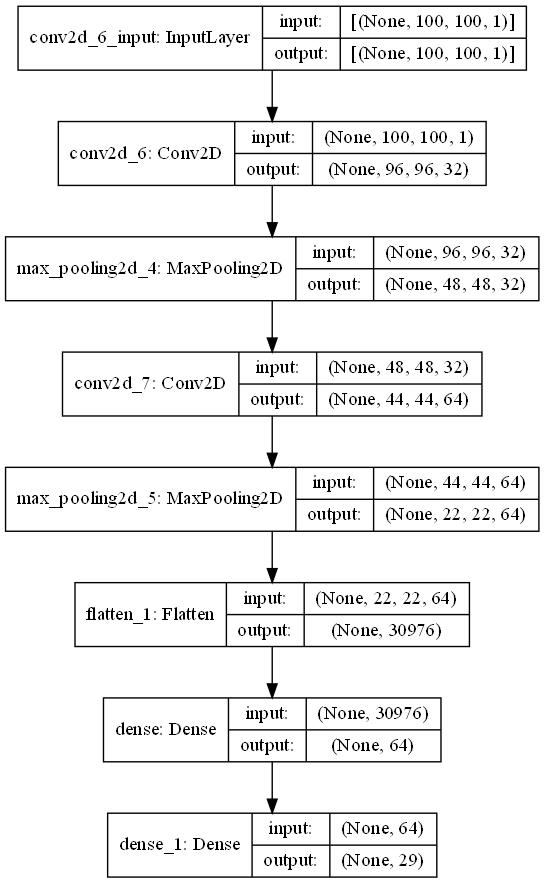

In [43]:
model.summary()
plot_model(model,
          to_file = os.path.join(accuracy_plots_path, "cnn_baseline.jpg"),
          show_shapes = True,
          show_layer_names = True,
          rankdir = "TB",
          expand_nested = False,
          dpi = 100)

In [45]:
model_log = model.fit(x_train, y_train,
                     batch_size = batch_size,
                     epochs = epochs,
                     verbose = 1, #provide detailed report after each epoch
                     validation_data = (x_valid, y_valid))

Epoch 1/100


ValueError: in user code:

    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:754 train_step
        y_pred = self(x, training=True)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:234 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_4 is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: (None, 100, 100)
